#  Instacart Market Basket Analysis EDA
This notebook uses a dataset from [Kaggle's Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis) competition:
>In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. 

## Load data

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [42]:
orders = pd.read_csv('orders.csv')
orders.shape

(3421083, 7)

In [46]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [2]:
order_products_train = pd.read_csv('order_products_train.csv')
order_products_train.shape

(1384617, 4)

In [3]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [50]:
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_prior.shape

(32434489, 4)

In [51]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
products = pd.read_csv('products.csv')
products.shape

In [56]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [52]:
aisles = pd.read_csv('aisles.csv')
aisles.shape

(134, 2)

In [53]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [54]:
departments = pd.read_csv('departments.csv')
departments.shape

(21, 2)

In [55]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## When do people order?

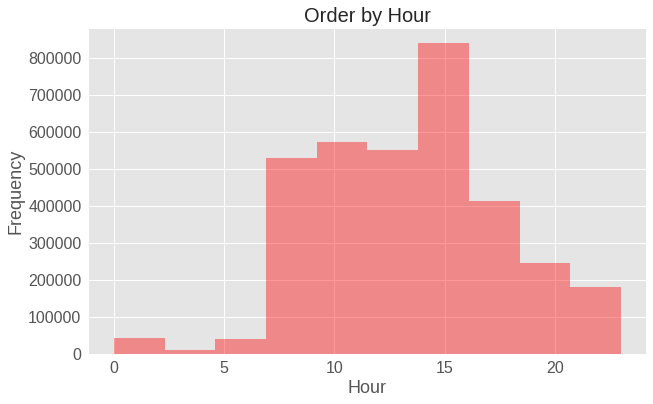

In [72]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(orders.order_hour_of_day, bins=10, kde=False, color='red')

plt.xlabel('Hour', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Order by Hour', fontsize=20)
plt.show()

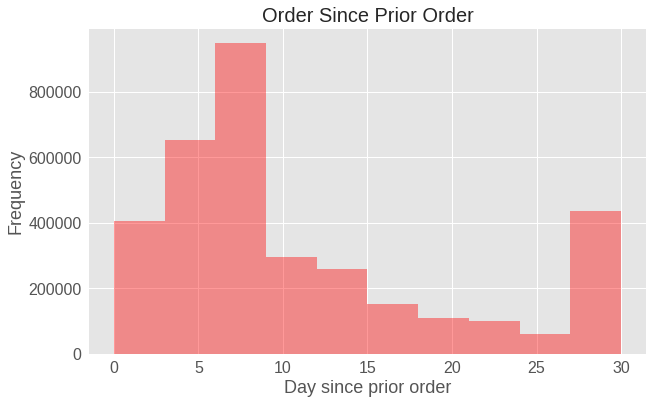

In [99]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(orders.days_since_prior_order, bins=10, kde=False, color='red')

plt.xlabel('Day since prior order', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Order Since Prior Order', fontsize=20)
plt.show()

In [16]:
print('Number of unique orders: {}'.format(len(order_products_train.order_id.unique())))

Number of unique orders: 131209


In [17]:
print('Number of unique products: {}'.format(len(order_products_train.product_id.unique())))

Number of unique products: 39123


In [19]:
print('Number of re-ordered items: {}'.format(order_products_train.reordered.sum()))

Number of re-ordered items: 828824


In [102]:
data = order_products_train.groupby('order_id')['reordered'].aggregate('sum').reset_index()
data['reordered'].ix[data['reordered'] > 1] = 1

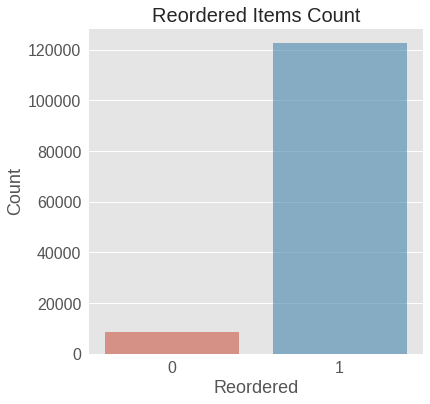

In [101]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

sns.countplot(data.reordered, alpha=0.6)

plt.xlabel('Reordered', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Reordered Items Count', fontsize=20)
plt.show()

In [41]:
print('Number of unique users in the orders file: {}'.format(len(orders.user_id.unique())))

Number of unique users in the orders file: 206209
